In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv(r"C:\Users\USER\OneDrive - 한국외국어대학교\바탕 화면\open\train.csv")
test = pd.read_csv(r"C:\Users\USER\OneDrive - 한국외국어대학교\바탕 화면\open\test.csv")
submission = pd.read_csv(r"C:\Users\USER\OneDrive - 한국외국어대학교\바탕 화면\open\sample_submission.csv")
international = pd.read_csv(r"C:\Users\USER\OneDrive - 한국외국어대학교\바탕 화면\open\international_trade.csv")

In [ ]:
train

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


2019년 1월부터 2023년 3월 3일까지, 총 4년의 데이터
corpoation은 A~F로 구성


In [ ]:
train['ID'].value_counts()

ID
TG_A_J_20190101    1
RD_E_J_20190106    1
RD_D_S_20230225    1
RD_D_S_20230226    1
RD_D_S_20230227    1
                  ..
CR_D_J_20190105    1
CR_D_J_20190106    1
CR_D_J_20190107    1
CR_D_J_20190108    1
RD_F_J_20230303    1
Name: count, Length: 59397, dtype: int64

In [ ]:
train['item'].value_counts()

item
TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: count, dtype: int64

In [ ]:
train['corporation'].value_counts(dropna=False)

corporation
A    13707
E    13707
D    12184
C     9138
B     7615
F     3046
Name: count, dtype: int64

In [ ]:
train['location'].value_counts(dropna=False)

location
J    35029
S    24368
Name: count, dtype: int64

In [ ]:
train.sort_values(['supply(kg)'],ascending=[True])

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
35144,RD_C_S_20190426,2019-04-26,RD,C,S,0.0,0.0
35145,RD_C_S_20190427,2019-04-27,RD,C,S,0.0,0.0
35146,RD_C_S_20190428,2019-04-28,RD,C,S,0.0,0.0
35147,RD_C_S_20190429,2019-04-29,RD,C,S,0.0,0.0
...,...,...,...,...,...,...,...
58724,RD_F_J_20210430,2021-04-30,RD,F,J,1046200.0,378.0
58622,RD_F_J_20210118,2021-01-18,RD,F,J,1116320.0,595.0
58711,RD_F_J_20210417,2021-04-17,RD,F,J,1154280.0,327.0
58695,RD_F_J_20210401,2021-04-01,RD,F,J,1167280.0,271.0


In [ ]:
train.sort_values(['price(원/kg)'], ascending = [True])

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
35144,RD_C_S_20190426,2019-04-26,RD,C,S,0.0,0.0
35145,RD_C_S_20190427,2019-04-27,RD,C,S,0.0,0.0
35146,RD_C_S_20190428,2019-04-28,RD,C,S,0.0,0.0
35147,RD_C_S_20190429,2019-04-29,RD,C,S,0.0,0.0
...,...,...,...,...,...,...,...
7313,TG_C_J_20220506,2022-05-06,TG,C,J,128.0,14375.0
7312,TG_C_J_20220505,2022-05-05,TG,C,J,180.0,14500.0
7319,TG_C_J_20220512,2022-05-12,TG,C,J,194.0,15015.0
7306,TG_C_J_20220429,2022-04-29,TG,C,J,114.0,15123.0


item: 품목 코드
TG : 감귤
BC : 브로콜리
RD : 무
CR : 당근
CB : 양배추
corporation : 유통 법인 코드
법인 A부터 F 존재
location : 지역 코드
J : 제주도 제주시
S : 제주도 서귀포시
supply(kg) : 유통된 물량, kg 단위
price(원/kg) : 유통된 품목들의 kg 마다의 가격, 원 단위

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = "NanumGothic"

<Axes: xlabel='item', ylabel='price(원/kg)'>

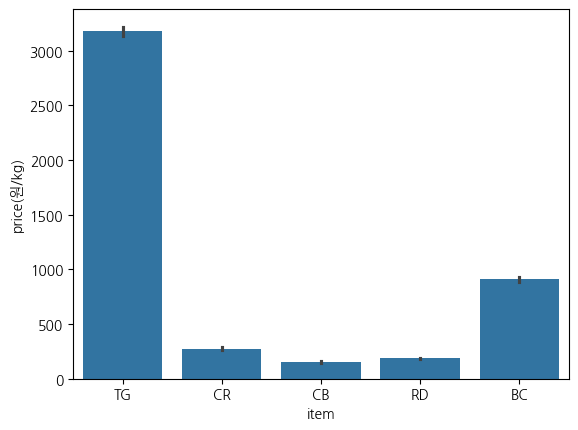

In [ ]:
#1순위. item-price의 관계 확인
sns.barplot(x = 'item', y='price(원/kg)', data = train)

<Axes: xlabel='item', ylabel='supply(kg)'>

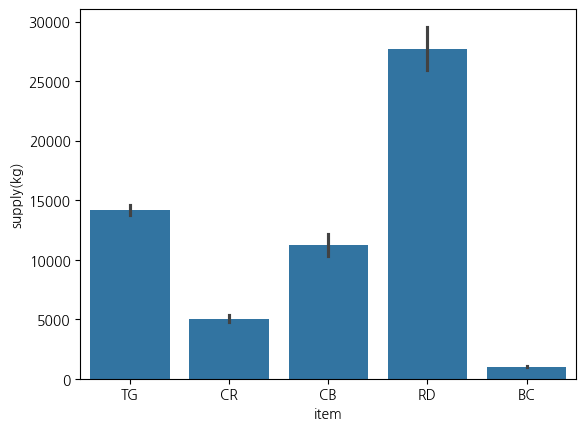

In [ ]:
#2순위. item-supply의 관계
sns.barplot(x = 'item', y='supply(kg)', data = train)

In [ ]:
#시간 데이터 변경
train['일시'] = pd.to_datetime(train['timestamp'], format='%Y-%m-%d')
train['월'] = train['일시'].dt.strftime('%m')
train['일'] = train['일시'].dt.strftime('%d')
train['연도'] = train['일시'].dt.strftime('%Y')
train['요일'] = train['일시'].dt.day_name()

In [ ]:
train

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),일시,월,일,연도,요일
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019-01-01,01,01,2019,Tuesday
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019-01-02,01,02,2019,Wednesday
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019-01-03,01,03,2019,Thursday
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019-01-04,01,04,2019,Friday
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019-01-05,01,05,2019,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023-02-27,02,27,2023,Monday
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023-02-28,02,28,2023,Tuesday
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023-03-01,03,01,2023,Wednesday
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023-03-02,03,02,2023,Thursday


<Axes: xlabel='요일', ylabel='supply(kg)'>

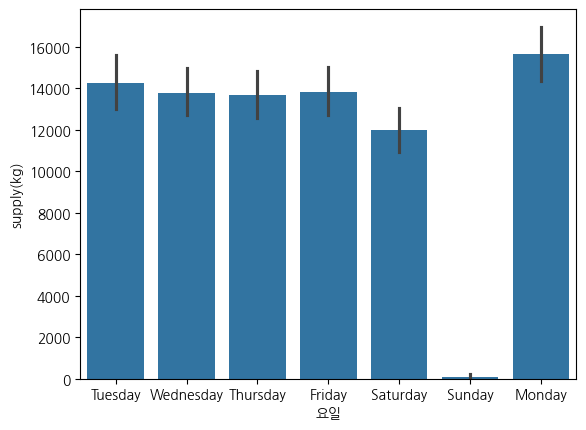

In [ ]:
#1순위. 요일별 공급량 수 확인
sns.barplot(x = '요일', y='supply(kg)', data = train)

일요일은 거의 없는 듯
월요일이 가장 많음
공휴일은 어떨지 계산

In [ ]:
from pytimekr import pytimekr
from datetime import timedelta, datetime

holiday = []
for i in range(2019, 2024):
    holiday.append(pytimekr.hangul(i).strftime("%Y-%m-%d"))
    holiday.append(pytimekr.children(i).strftime("%Y-%m-%d"))
    holiday.append(pytimekr.independence(i).strftime("%Y-%m-%d"))
    holiday.append(pytimekr.memorial(i).strftime("%Y-%m-%d"))
    holiday.append(pytimekr.buddha(i).strftime("%Y-%m-%d"))
    holiday.append(pytimekr.samiljeol(i).strftime("%Y-%m-%d"))
    holiday.append(pytimekr.chuseok(i).strftime("%Y-%m-%d"))
    holiday.append(pytimekr.lunar_newyear(i).strftime("%Y-%m-%d"))

holiday = pd.to_datetime(holiday, format = "%Y-%m-%d")
print(holiday)

DatetimeIndex(['2019-10-09', '2019-05-05', '2019-08-15', '2019-06-06',
               '2019-05-12', '2019-03-01', '2019-09-13', '2019-02-05',
               '2020-10-09', '2020-05-05', '2020-08-15', '2020-06-06',
               '2020-04-30', '2020-03-01', '2020-10-01', '2020-01-25',
               '2021-10-09', '2021-05-05', '2021-08-15', '2021-06-06',
               '2021-05-19', '2021-03-01', '2021-09-21', '2021-02-12',
               '2022-10-09', '2022-05-05', '2022-08-15', '2022-06-06',
               '2022-05-08', '2022-03-01', '2022-09-10', '2022-02-01',
               '2023-10-09', '2023-05-05', '2023-08-15', '2023-06-06',
               '2023-05-26', '2023-03-01', '2023-09-29', '2023-01-22'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
train

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),일시,월,일,연도,요일
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019-01-01,01,01,2019,Tuesday
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019-01-02,01,02,2019,Wednesday
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019-01-03,01,03,2019,Thursday
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019-01-04,01,04,2019,Friday
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019-01-05,01,05,2019,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023-02-27,02,27,2023,Monday
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023-02-28,02,28,2023,Tuesday
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023-03-01,03,01,2023,Wednesday
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023-03-02,03,02,2023,Thursday


In [ ]:
train['공휴일'] = train['일시'].isin(
                ['2019-10-09', '2019-05-05', '2019-08-15', '2019-06-06',
               '2019-05-12', '2019-03-01', '2019-09-13', '2019-02-05',
               '2020-10-09', '2020-05-05', '2020-08-15', '2020-06-06',
               '2020-04-30', '2020-03-01', '2020-10-01', '2020-01-25',
               '2021-10-09', '2021-05-05', '2021-08-15', '2021-06-06',
               '2021-05-19', '2021-03-01', '2021-09-21', '2021-02-12',
               '2022-10-09', '2022-05-05', '2022-08-15', '2022-06-06',
               '2022-05-08', '2022-03-01', '2022-09-10', '2022-02-01',
               '2023-10-09', '2023-05-05', '2023-08-15', '2023-06-06',
               '2023-05-26', '2023-03-01', '2023-09-29', '2023-01-22']).astype(object)

In [ ]:
train

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),일시,월,일,연도,요일,공휴일
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019-01-01,01,01,2019,Tuesday,False
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019-01-02,01,02,2019,Wednesday,False
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019-01-03,01,03,2019,Thursday,False
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019-01-04,01,04,2019,Friday,False
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019-01-05,01,05,2019,Saturday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023-02-27,02,27,2023,Monday,False
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023-02-28,02,28,2023,Tuesday,False
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023-03-01,03,01,2023,Wednesday,True
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023-03-02,03,02,2023,Thursday,False


<Axes: xlabel='공휴일', ylabel='supply(kg)'>

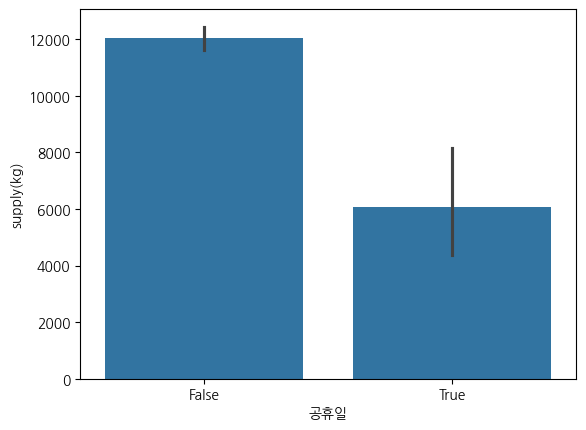

In [ ]:
#2순위. 공휴일과 공급량
sns.barplot(x = '공휴일', y = 'supply(kg)', data= train)

공휴일일 경우, 공급량이 줄음

<Axes: xlabel='연도', ylabel='price(원/kg)'>

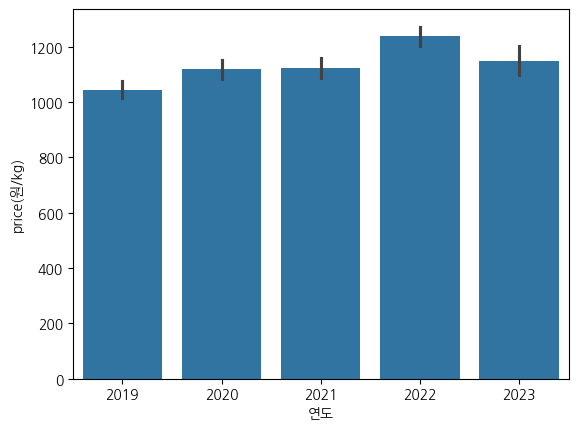

In [ ]:
#3순위. 연도별 가격 차이
sns.barplot(x = '연도', y='price(원/kg)', data = train)

<Axes: xlabel='연도', ylabel='supply(kg)'>

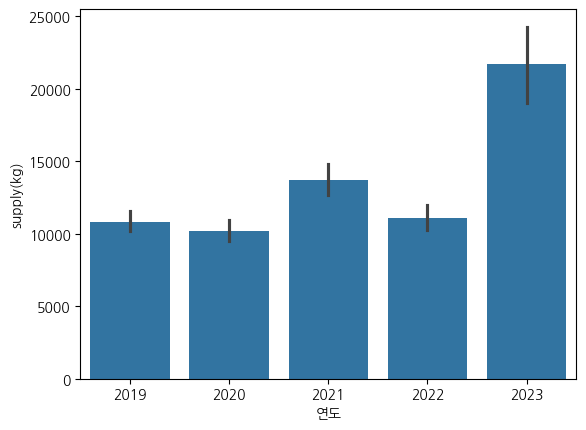

In [ ]:
#4순위. 연도별 공급 차이
sns.barplot(x = '연도', y='supply(kg)', data = train)

In [ ]:
#2023년에 공급량이 확 늘었음

<Axes: xlabel='월', ylabel='price(원/kg)'>

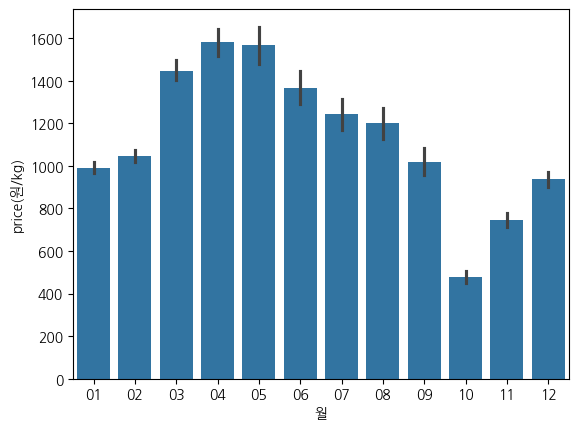

In [ ]:
#5순위. 월별 가격 차이
sns.barplot(x = '월', y='price(원/kg)', data = train)

4월 5월 최고
10월 최저

<Axes: xlabel='월', ylabel='supply(kg)'>

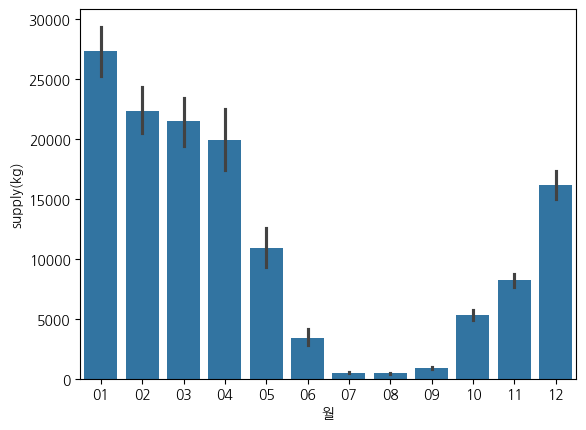

In [ ]:
#6순위. 월별 공급 차이
sns.barplot(x = '월', y='supply(kg)', data = train)

7,8,9월에는 공급량이 적음

귤, 봄일때 높은 가격인 것을 알 수 있음
<br/>
여름, 양배추일 때 낮은 공급량인 것을 알 수 있음
<br/>
일요일은 공급량 낮음
<br/>
공휴일에도 공급량은 존재함

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

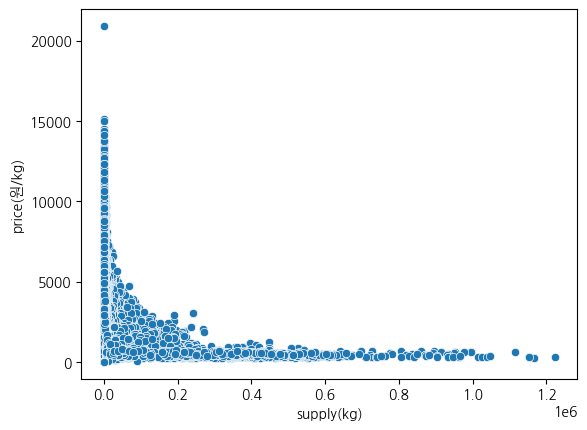

In [ ]:
sns.scatterplot(x = 'supply(kg)', y = 'price(원/kg)', data = train)

근데, 공급량이 0인데 왜 price가 존재?
<br/>
supply와 price가 0인 것은 어떻게 처리?

In [ ]:
train['price(원/kg)'].value_counts()

price(원/kg)
0.0       35455
500.0        50
1000.0       45
550.0        42
400.0        41
          ...  
6234.0        1
5686.0        1
5818.0        1
5652.0        1
655.0         1
Name: count, Length: 7094, dtype: int64

In [ ]:
train['supply(kg)'].value_counts()

supply(kg)
0.0         35452
4300.0        181
8600.0         85
8620.0         84
200.0          83
            ...  
13289.0         1
11706.0         1
13522.0         1
17693.0         1
427520.0        1
Name: count, Length: 12521, dtype: int64

0이 너무 많음.. 절반 이상

<Axes: ylabel='price(원/kg)'>

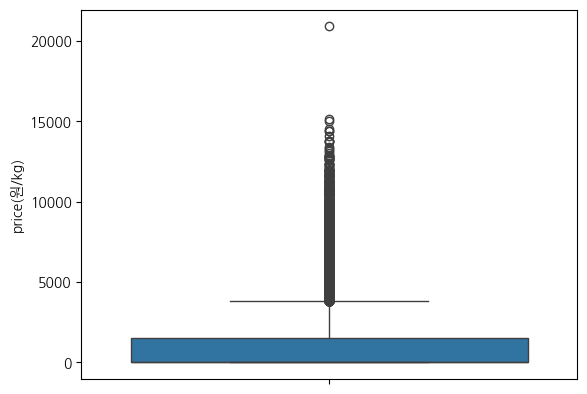

In [ ]:
sns.boxplot(data = train, y='price(원/kg)')

<Axes: ylabel='supply(kg)'>

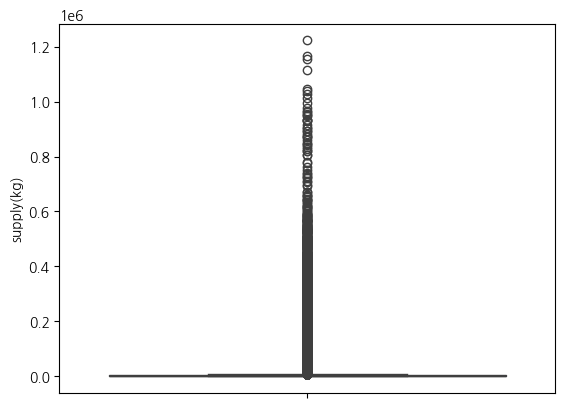

In [ ]:
sns.boxplot(data = train, y = 'supply(kg)')

In [ ]:
#일단 IQR 이용해..이상치 탐색하고 그냥 중앙값으로 대체
#공급, 가격만 이상치 처리
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5* IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[column]<lower_bound)|(data[column]>upper_bound)
    median_value = data[column].median()
    data.loc[outliers,column]= median_value

handle_outliers(train, 'supply(kg)')
handle_outliers(train, 'price(원/kg)')

<Axes: ylabel='supply(kg)'>

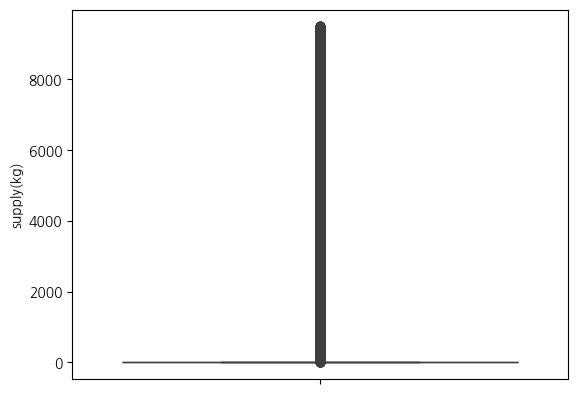

In [ ]:
sns.boxplot(data = train, y = 'supply(kg)')

In [ ]:
test

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


In [ ]:
submission

,ID,answer
0,TG_A_J_20230304,0
1,TG_A_J_20230305,0
2,TG_A_J_20230306,0
3,TG_A_J_20230307,0
4,TG_A_J_20230308,0
...,...,...
1087,RD_F_J_20230327,0
1088,RD_F_J_20230328,0
1089,RD_F_J_20230329,0
1090,RD_F_J_20230330,0


In [ ]:
international

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


2. international_trade.csv

관련 품목 수출입 정보, 중량 단위 kg, 금액 단위 천 달러

In [ ]:
international.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      1274 non-null   object
 1   품목명     1274 non-null   object
 2   수출 중량   1274 non-null   int64 
 3   수출 금액   1274 non-null   int64 
 4   수입 중량   1274 non-null   int64 
 5   수입 금액   1274 non-null   int64 
 6   무역수지    1274 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 69.8+ KB


In [ ]:
international.value_counts()

기간       품목명                        수출 중량    수출 금액  수입 중량    수입 금액  무역수지 
2019-01  감귤                         58368    172    0        0       172     1
2021-10  오이류(신선한 것이나 냉장한 것으로 한정한다)  1894     10     0        0       10      1
2021-11  감귤                         3399820  3072   0        0       3072    1
2021-10  포포(papaw)[파파야(papaya)]     0        0      21670    53     -53      1
         파인애플                       0        0      4264663  3935   -3935    1
                                                                            ..
2020-05  토마토(신선한 것이나 냉장한 것으로 한정한다)  270762   758    0        0       758     1
         쪽파                         208      0      258922   202    -202     1
         자두                         11       0      0        0       0       1
         오이류(신선한 것이나 냉장한 것으로 한정한다)  11830    29     0        0       29      1
2023-02  포포(papaw)[파파야(papaya)]     0        0      23830    71     -71      1
Name: count, Length: 1274, dtype: int64

In [ ]:
international.describe()

,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
count,1.274000e+03,1274.000000,1.274000e+03,1274.000000,1274.000000
mean,2.005844e+05,360.425432,1.255735e+06,1548.219780,-1187.789639
std,9.669554e+05,1689.359223,3.680257e+06,5844.805789,6171.655116
min,0.000000e+00,0.000000,0.000000e+00,0.000000,-84117.000000
25%,0.000000e+00,0.000000,0.000000e+00,0.000000,-1240.500000
50%,1.255000e+02,1.000000,2.926950e+04,89.500000,-61.500000
75%,1.556525e+04,31.000000,1.022696e+06,1253.000000,9.000000
max,2.094942e+07,16278.000000,4.975914e+07,84118.000000,16278.000000


In [ ]:
international['품목명'].value_counts()

품목명
감귤                                                                               50
포포(papaw)[파파야(papaya)]                                                           50
레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]                               50
그레이프프루트(grapefruit)와 포멜로(pomelo)                                                 50
오렌지                                                                              50
망고(mango)                                                                        50
파인애플                                                                             50
무화과                                                                              50
대추야자                                                                             50
사과                                                                               50
오이류(신선한 것이나 냉장한 것으로 한정한다)                                                        50
당근                                                                      

In [ ]:
international['품목명'].unique()

array(['토마토(신선한 것이나 냉장한 것으로 한정한다)', '양파', '쪽파', '꽃양배추와 브로콜리(broccoli)',
       '방울다다기 양배추', '양배추', '결구(結球) 상추',
       '위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]',
       '당근', '오이류(신선한 것이나 냉장한 것으로 한정한다)',
       '콩[비그나(Vigna)속ㆍ파세러스(Phaseolus)속)]', '대추야자', '무화과', '파인애플',
       '망고(mango)', '망고스틴(mangosteen)', '오렌지', '감귤',
       '그레이프프루트(grapefruit)와 포멜로(pomelo)',
       '레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]', '수박',
       '포포(papaw)[파파야(papaya)]', '사과', '배', '자두',
       '완두[피섬 새티범(Pisum sativum)]', '구아바(guava)', '살구',
       '신 체리[프루너스 체라서스(Prunus cerasus)]', '복숭아[넥터린(nectarine)을 포함한다]',
       '순무', '방울토마토', '샬롯(shallot)', '참외'], dtype=object)

1순위: 품목명 나누기

In [ ]:
mapping = {
    '토마토(신선한 것이나 냉장한 것으로 한정한다)': 'TG',
    '양파': 'CB',
    '쪽파': 'CB',
    '꽃양배추와 브로콜리(broccoli)': 'BC',
    '방울다다기 양배추': 'CB',
    '양배추': 'CB',
    '결구(結球) 상추': 'CB',
    '위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]': 'CB',
    '당근': 'CR',
    '오이류(신선한 것이나 냉장한 것으로 한정한다)': 'TG',
    '콩[비그나(Vigna)속ㆍ파세러스(Phaseolus)속)]': None,
    '대추야자': None,
    '무화과': 'RD',
    '파인애플': None,
    '망고(mango)': None,
    '망고스틴(mangosteen)': None,
    '오렌지': None,
    '감귤': 'TG',
    '그레이프프루트(grapefruit)와 포멜로(pomelo)': None,
    '레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]': None,
    '수박': None,
    '포포(papaw)[파파야(papaya)]': None,
    '사과': None,
    '배': None,
    '자두': None,
    '완두[피섬 새티범(Pisum sativum)]': None,
    '구아바(guava)': None,
    '살구': None,
    '신 체리[프루너스 체라서스(Prunus cerasus)]': None,
    '복숭아[넥터린(nectarine)을 포함한다]': None,
    '순무': None,
    '방울토마토': 'TG',
    '샬롯(shallot)': None,
    '참외': None
}

def map_category(item_name):
    return mapping.get(item_name, None)

In [ ]:
international['분류'] = international['품목명'].map(map_category)

In [ ]:
international

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지,분류
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990,TG
1,2019-01,양파,821330,222,4003206,1118,-896,CB
2,2019-01,쪽파,60,1,93405,128,-127,CB
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562,BC
4,2019-01,방울다다기 양배추,0,0,7580,38,-38,CB
...,...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71,None
1270,2023-02,사과,135165,351,0,0,351,None
1271,2023-02,배,2206012,5411,1,0,5411,None
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0,None


In [ ]:
international['분류'].value_counts()

분류
CB    250
TG    150
BC     50
CR     50
RD     50
Name: count, dtype: int64

In [ ]:
#감귤, 비감귤
#휴일데이터는 어떻게 처리할 것인가?
#lstm


1.일요일 데이터 분류(일요일은 거의 없었음. 따라서 제거해서 lstm구하기로 함)
<br/>
2.감귤과 비감귤의 분류


In [ ]:
train

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),일시,월,일,연도,요일,공휴일
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019-01-01,01,01,2019,Tuesday,False
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019-01-02,01,02,2019,Wednesday,False
2,TG_A_J_20190103,2019-01-03,TG,A,J,0.0,1728.0,2019-01-03,01,03,2019,Thursday,False
3,TG_A_J_20190104,2019-01-04,TG,A,J,0.0,1408.0,2019-01-04,01,04,2019,Friday,False
4,TG_A_J_20190105,2019-01-05,TG,A,J,0.0,1250.0,2019-01-05,01,05,2019,Saturday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,0.0,468.0,2023-02-27,02,27,2023,Monday,False
59393,RD_F_J_20230228,2023-02-28,RD,F,J,0.0,531.0,2023-02-28,02,28,2023,Tuesday,False
59394,RD_F_J_20230301,2023-03-01,RD,F,J,0.0,574.0,2023-03-01,03,01,2023,Wednesday,True
59395,RD_F_J_20230302,2023-03-02,RD,F,J,0.0,523.0,2023-03-02,03,02,2023,Thursday,False


In [ ]:
international

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지,분류
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990,TG
1,2019-01,양파,821330,222,4003206,1118,-896,CB
2,2019-01,쪽파,60,1,93405,128,-127,CB
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562,BC
4,2019-01,방울다다기 양배추,0,0,7580,38,-38,CB
...,...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71,None
1270,2023-02,사과,135165,351,0,0,351,None
1271,2023-02,배,2206012,5411,1,0,5411,None
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0,None


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           59397 non-null  object        
 1   timestamp    59397 non-null  object        
 2   item         59397 non-null  object        
 3   corporation  59397 non-null  object        
 4   location     59397 non-null  object        
 5   supply(kg)   59397 non-null  float64       
 6   price(원/kg)  59397 non-null  float64       
 7   일시           59397 non-null  datetime64[ns]
 8   월            59397 non-null  object        
 9   일            59397 non-null  object        
 10  연도           59397 non-null  object        
 11  요일           59397 non-null  object        
 12  공휴일          59397 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 5.9+ MB


In [ ]:
international.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      1274 non-null   object
 1   품목명     1274 non-null   object
 2   수출 중량   1274 non-null   int64 
 3   수출 금액   1274 non-null   int64 
 4   수입 중량   1274 non-null   int64 
 5   수입 금액   1274 non-null   int64 
 6   무역수지    1274 non-null   int64 
 7   분류      550 non-null    object
dtypes: int64(5), object(3)
memory usage: 79.8+ KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
#일단 일요일이 아닌 데이터들만 비교하기로 함
train = train[train['요일'] != 'Sunday']

In [ ]:
#감귤과 비 감귤로 구분
tg_train = train[train['item']=='TG']
nontg_train = train[train['item'] != 'TG']

In [ ]:
tg_time_data = tg_train['price(원/kg)'].values
nontg_time_data = nontg_train['price(원/kg)'].values

In [ ]:
#이상치를 제거했기에 표준화 안쓰고, minmaxscaler로 정규화하기로 결정(2차원 배열로 바꿈)
scaler = MinMaxScaler(feature_range = (0,1))
tg_time_data = scaler.fit_transform(tg_time_data.reshape(-1,1))
nontg_time_data = scaler.fit_transform(nontg_time_data.reshape(-1,1))

In [ ]:
#하루 단위라 time_step를 1로 설정했음
def create_dataset(dataset, time_steps = 1):
    X, y = [], []
    for i in  range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        y.append(dataset[i+time_steps, 0])
    return np.array(X),np.array(y)

In [ ]:
time_steps = 1
X_tg, y_tg = create_dataset(tg_time_data, time_steps)
X_non_tg, y_non_tg = create_dataset(nontg_time_data, time_steps)

In [ ]:
#감귤 모델 만듦
#아담옵티마이저 선택, 손실함수로는 MSE사용
model_tg = Sequential()
model_tg.add(LSTM(units = 50, return_sequences = True, input_shape = (X_tg.shape[1], 1)))
model_tg.add(LSTM(units = 50))
model_tg.add(Dense(units=1)) #출력값이 하나의 스칼라여서 1로 설정함
model_tg.compile(optimizer = 'adam', loss='mean_squared_error')
#하이퍼파라미터도 없고, 빠른 학습을 위해 adam사용
#adam을 사용했고, 빠른 학습을 위해 mse사용(엔트로피 기법보단 좋을 것이라 예상했음)

In [ ]:
#비 감귤 모델 만듦
model_nontg = Sequential()
model_nontg.add(LSTM(units = 50, return_sequences = True, input_shape = (X_non_tg.shape[-1], 1)))
model_nontg.add(LSTM(units = 50))
model_nontg.add(Dense(units=1))
model_nontg.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_tg.fit(X_tg, y_tg, epochs=100,batch_size=32)
model_nontg.fit(X_non_tg, y_non_tg, epochs=100,batch_size=32)

Epoch 1/100

409/409 [==============================] - 11s 7ms/step - loss: 0.0517
Epoch 2/100
409/409 [==============================] - 3s 7ms/step - loss: 0.0423
Epoch 3/100
409/409 [==============================] - 3s 8ms/step - loss: 0.0411
Epoch 4/100
409/409 [==============================] - 3s 7ms/step - loss: 0.0406
Epoch 5/100
409/409 [==============================] - 3s 7ms/step - loss: 0.0405
Epoch 6/100
409/409 [==============================] - 3s 7ms/step - loss: 0.0405
Epoch 7/100
409/409 [==============================] - 3s 7ms/step - loss: 0.0405
Epoch 8/100
409/409 [==============================] - 3s 8ms/step - loss: 0.0405
Epoch 9/100
409/409 [==============================] - 3s 8ms/step - loss: 0.0405
Epoch 10/100
409/409 [==============================] - 3s 8ms/step - loss: 0.0405
Epoch 11/100
409/409 [==============================] - 3s 8ms/step - loss: 0.0404
Epoch 12/100
409/409 [==============================] - 4s 9ms/step - loss: 0.0404
Epoch 13/10

In [ ]:
# 학습한 데이터에 대해 평균적으로 0.0174의 오차

In [ ]:
def predict_prices(model, X):
    predicted_prices = model.predict(X)
    predicted_prices = scaler.inverse_transform(predicted_prices)
    return predicted_prices

predicted_prices_tg = predict_prices(model_tg, X_tg)
predicted_prices_nontg = predict_prices(model_nontg, X_non_tg)

1184/1184 [==============================] - 6s 4ms/step


In [ ]:
print(predicted_prices_tg)
print(predicted_prices_nontg)

[[ 218.99016]
 [ 218.99016]
 [1742.5859 ]
 ...
 [1946.7177 ]
 [2078.6946 ]
 [ 218.99013]]
[[130.1653 ]
 [130.1653 ]
 [130.1653 ]
 ...
 [425.19305]
 [468.80817]
 [499.22937]]


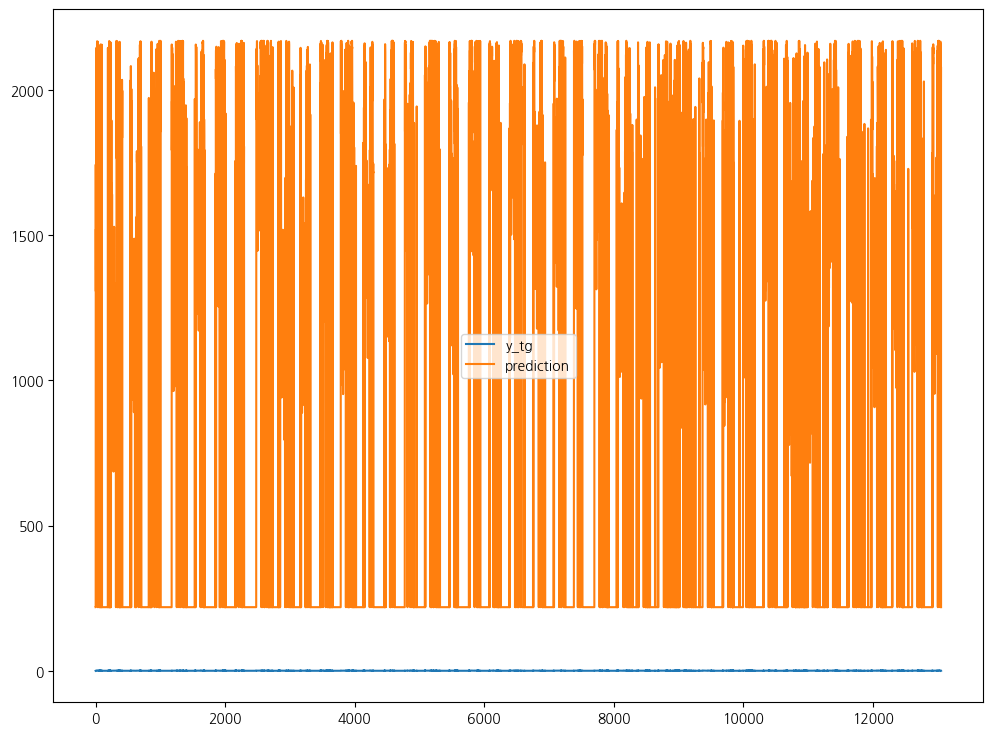

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(y_tg, label = 'y_tg')
plt.plot(predicted_prices_tg, label = 'prediction')
plt.legend()
plt.show()

In [ ]:
#mse를 통해 오차 계산함
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse_tg = mean_squared_error(y_tg, predicted_prices_tg)
mae_tg = mean_absolute_error(y_tg, predicted_prices_tg)

In [ ]:
mse_nontg = mean_squared_error(y_non_tg, predicted_prices_nontg)
mae_nontg = mean_absolute_error(y_non_tg, predicted_prices_nontg)

In [ ]:
print("감귤에 대한 MSE:", mse_tg)
print("감귤에 대한 MAE:", mae_tg)

print("비감귤에 대한 MSE:", mse_nontg)
print("비감귤에 대한 MAE:", mae_nontg)

감귤에 대한 MSE: 1394276.0084410878
감귤에 대한 MAE: 884.9304255996362
비감귤에 대한 MSE: 614914.0282003387
비감귤에 대한 MAE: 443.7887896813677


In [ ]:
#감귤 안 나눈 것, 일요일 구분 안한 것
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

scaler = MinMaxScaler(feature_range=(0, 1))
time_data = scaler.fit_transform(train['price(원/kg)'].values.reshape(-1, 1))

def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        y.append(dataset[i+time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 7  #(일주일 단위로 데이터를 묶음)

X, y = create_dataset(time_data, time_steps)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=100, batch_size=32)

def predict_prices(model, X):
    predicted_prices = model.predict(X)
    predicted_prices = scaler.inverse_transform(predicted_prices)
    return predicted_prices

predicted_prices = predict_prices(model, X)

mse = mean_squared_error(y, predicted_prices)
mae = mean_absolute_error(y, predicted_prices)

print("MSE:", mse)
print("MAE:", mae)

Epoch 1/100
1592/1592 [==============================] - 30s 14ms/step - loss: 0.0213
Epoch 2/100
1592/1592 [==============================] - 27s 17ms/step - loss: 0.0202
Epoch 3/100
1592/1592 [==============================] - 44s 27ms/step - loss: 0.0202
Epoch 4/100
1592/1592 [==============================] - 35s 22ms/step - loss: 0.0201
Epoch 5/100
1592/1592 [==============================] - 29s 18ms/step - loss: 0.0200
Epoch 6/100
1592/1592 [==============================] - 24s 15ms/step - loss: 0.0200
Epoch 7/100
1592/1592 [==============================] - 22s 14ms/step - loss: 0.0200
Epoch 8/100
1592/1592 [==============================] - 25s 16ms/step - loss: 0.0199
Epoch 9/100
1592/1592 [==============================] - 23s 14ms/step - loss: 0.0199
Epoch 10/100
1592/1592 [==============================] - 20s 12ms/step - loss: 0.0199
Epoch 11/100
1592/1592 [==============================] - 20s 13ms/step - loss: 0.0199
Epoch 12/100
1592/1592 [============================